In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

In [2]:
states=pd.read_excel("states_full.xls", encoding="utf8")

1NCİ SORU:

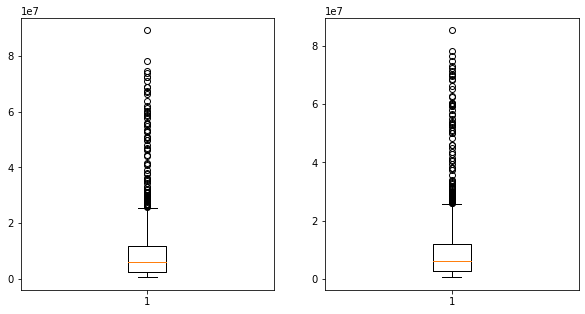

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(states["TOTAL_REVENUE"])

plt.subplot(1,2,2)
plt.boxplot(states["TOTAL_EXPENDITURE"])

plt.show()

Kutu grafiğine baktığımızda veri setimizde uç değerler olduğunu görüyoruz. Bu durumda, TUKEY Yöntemi ile uç değerlerin miktarlarına bakalım.

In [4]:
def tukey(veri_listesi):
    q75, q25 = np.percentile(veri_listesi, [75 ,25])
    caa = q75 - q25
    
    esik_degerler=pd.DataFrame()
    
    for esik_degeri in np.arange(1,5.5,0.5):
        min_deger = q25 - (caa*esik_degeri)
        maks_deger = q75 + (caa*esik_degeri)
    
        aykiri_deger_sayisi = len((np.where((veri_listesi > maks_deger)| 
                                       (veri_listesi < min_deger))[0]))
    
        esik_degerler = esik_degerler.append({'Eşik Değeri': esik_degeri,'Aykırı Değer Sayısı': aykiri_deger_sayisi,
                                           }, ignore_index=True)
    
    return esik_degerler

In [5]:
tukey(states["TOTAL_REVENUE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,134.0,1.0
1,97.0,1.5
2,61.0,2.0
3,49.0,2.5
4,43.0,3.0
5,39.0,3.5
6,33.0,4.0
7,27.0,4.5
8,21.0,5.0


In [6]:
tukey(states["TOTAL_EXPENDITURE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,134.0,1.0
1,98.0,1.5
2,61.0,2.0
3,50.0,2.5
4,44.0,3.0
5,39.0,3.5
6,35.0,4.0
7,27.0,4.5
8,22.0,5.0


2NCİ SORU:

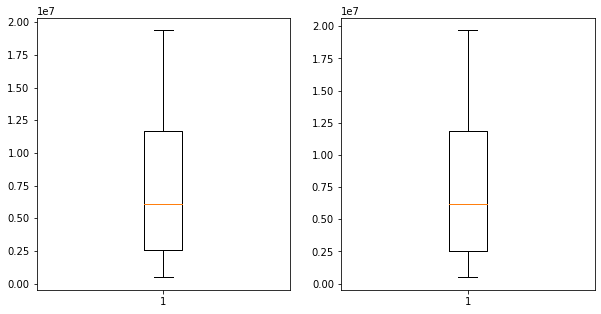

In [7]:
states["wins_TOTAL_REVENUE"]=winsorize(states["TOTAL_REVENUE"], (0, 0.1))
states["wins_TOTAL_EXPENDITURE"]=winsorize(states["TOTAL_EXPENDITURE"], (0, 0.1))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(states["wins_TOTAL_REVENUE"])

plt.subplot(1,2,2)
plt.boxplot(states["wins_TOTAL_EXPENDITURE"])

plt.show()

Veri setimizde çok fazla aykiri değer olduğu için bunları çıkarmamız doğru olmaz. Ayrıca, verileri dönüştürdüğümüzde (karekök veya log dönüşümü) veriler tamamen kaybolmak yerine ağırlıkları azalacağı için ve bizden istenen de tamamının yok edilmesi olduğuna göre winsorize metodunu kullandık.

In [8]:
tukey(states["wins_TOTAL_REVENUE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,0.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


In [9]:
tukey(states["wins_TOTAL_EXPENDITURE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,0.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


Yukarıdaki tablolarda görüldüğü üzere aykırı değer kalmadı.

3NCÜ SORU:

In [10]:
states["BUDGET_DEFICIT"]=states["TOTAL_REVENUE"]-states["TOTAL_EXPENDITURE"]

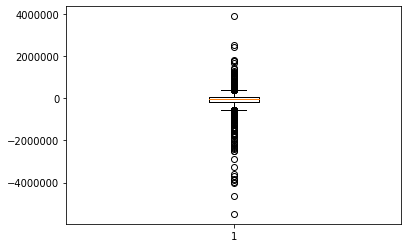

In [11]:
plt.boxplot(states["BUDGET_DEFICIT"])
plt.show()

In [12]:
tukey(states["BUDGET_DEFICIT"])

,Aykırı Değer Sayısı,Eşik Değeri
0,261.0,1.0
1,197.0,1.5
2,146.0,2.0
3,114.0,2.5
4,97.0,3.0
5,81.0,3.5
6,75.0,4.0
7,58.0,4.5
8,53.0,5.0


Bütçe açığı sütunumuzda da aykırı değerler mevcut. Bunları da winsorize metodu ile temizleyelim.

In [13]:
states["wins_BUDGET_DEFICIT"]=winsorize(states["BUDGET_DEFICIT"], (0.1, 0.1))

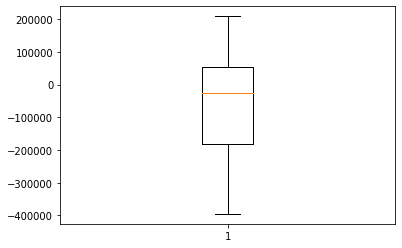

In [14]:
plt.boxplot(states["wins_BUDGET_DEFICIT"])
plt.show()

4NCÜ SORU:

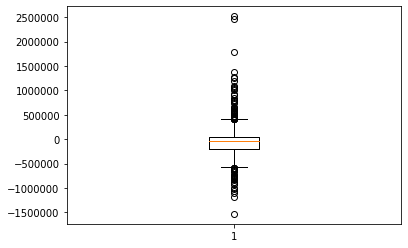

In [15]:
states["BUDGET_DEFICIT_CLRD"]=states["wins_TOTAL_REVENUE"]-states["wins_TOTAL_EXPENDITURE"]

plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.show()

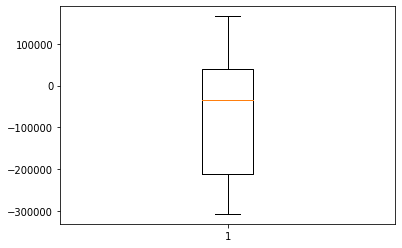

In [16]:
states["BUDGET_DEFICIT_CLRD"]=winsorize(states["BUDGET_DEFICIT_CLRD"], (0.1,0.1))

plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.show()

5NCİ SORU:

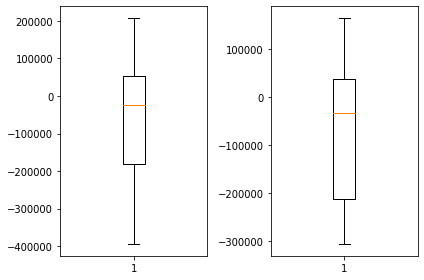

In [17]:
plt.subplot(121)
plt.boxplot(states["wins_BUDGET_DEFICIT"])
plt.subplot(122)
plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.tight_layout()
plt.show()

In [18]:
total=np.abs(states["BUDGET_DEFICIT"]).sum()
third=np.abs(states["BUDGET_DEFICIT"] - states["wins_BUDGET_DEFICIT"]).sum()
fourth=np.abs(states["BUDGET_DEFICIT"] - states["BUDGET_DEFICIT_CLRD"]).sum()

print("Total absolute amount of deficit..............: {:.0f}".format(np.abs(total)))
print("3rd Q, difference between real and manipulated: {:.0f}".format(third))
print("4th Q, difference between real and manipulated: {:.0f}".format(fourth))
print("\n")
print("3rd Q, manipulation ratio: % {:.0f}".format(np.abs((third*100)/total)))
print("4th Q, manipulation ratio: % {:.0f}".format(np.abs((fourth*100)/total)))

Total absolute amount of deficit..............: 387746667
3rd Q, difference between real and manipulated: 170408066
4th Q, difference between real and manipulated: 214038474


3rd Q, manipulation ratio: % 44
4th Q, manipulation ratio: % 55


> Üçüncü soruda, değerleri hesaplayıp sadece 1 kez winsorize işlemine tabi tuttuk.

> Dördüncü soruda, winsorize edilmiş değerler üzerinden tekrar winsorize işlemine tabi tuttuk.

Dördüncü soruda bir kaç kez değiştirildiği için toplam değer olarak daha fazla manipüle edilmiş olacaktır.

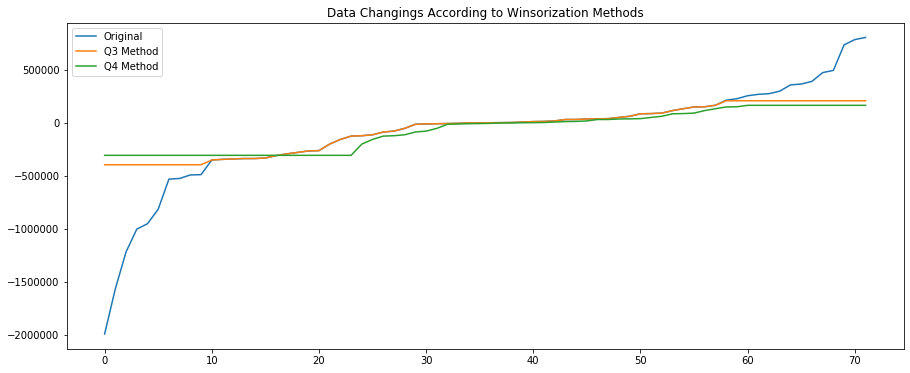

In [19]:
# Grafiğin daha kolay görelbilmesi için baştan ve sondan bir kısım veriler grafikten hariç tutulmaktadır.
beginning_crop=770
ending_crop=650

plt.figure(figsize=(15,6))
plt.title("Data Changings According to Winsorization Methods")

plt.plot(np.sort(states["BUDGET_DEFICIT"][beginning_crop : -ending_crop]), label="Original")
plt.plot(np.sort(states["wins_BUDGET_DEFICIT"][beginning_crop : -ending_crop]), label="Q3 Method")
plt.plot(np.sort(states["BUDGET_DEFICIT_CLRD"][beginning_crop : -ending_crop]), label="Q4 Method")

plt.legend()
plt.show()

Grafikte de görülebileceği üzere; 3ncü sorudaki yöntemle yapıldığında, veriler önceki haliyle daha uyumludur. Ayrıca, 3ncü sorudaki haliyle daha alt bir değerden winsorize işlemine başlanıp daha yukarı bir değerde sonlandırılmıştır. Yani daha az değer uç değer (outlier) olarak işlem görmüştür. Bu sebeplerle, 3üncü sorudaki yöntem daha uygundur.

6NCI SORU:

3ncü soruda yaptığımız işlem daha uygundur. Değerleri daha az miktarda manipüle ettik.